1\. Write a function that converts number representation (bin<->dec<->hex)

In [27]:
dic=['0','1','2','3','4','5','6','7','8','9','a','b','c','d','e','f']

def rep(num,base_output):
    s_in=(str)(num)
    if s_in[0:2]=='0b':
        s_in=s_in[2:]
        base_input=2
    elif s_in[0:2]=='0x':
        s_in=s_in[2:]
        base_input=16
    else:
        base_input=10
    num2=0
    l=len(s_in)
    for i, j in enumerate(s_in):
        for k, m in enumerate(dic):
            if j==m:
                num2+=k*(base_input)**(l-(i+1))
    s_out=''
    while num2>0:
        resto=num2%base_output
        s_out=dic[(int)(resto)]+s_out
        num2=(num2-resto)/base_output
    print(s_out)
    
rep(18,2)
rep(18,10)
rep(18,16)
rep('0b10010',2)
rep('0b10010',10)
rep('0b10010',16)
rep('0x12',2)
rep('0x12',10)
rep('0x12',16)

10010
18
12
10010
18
12
10010
18
12


2\. Write a function that converts a 32 bit word into a single precision floating point (i.e. interprets the various bits as sign, mantissa and exponent)

In [10]:
'{0:08b}'.format(6)
# 0 -> display from the first character
# : -> separator
# 0 -> put zero instead of leaving a blank space
# 8 -> 8 character "string"
# b -> binary format
# 6 -> display what in decimal format is 6

'00000110'

In [32]:
print(int('11000000101100000000000000000000',2))
n='{0:032b}'.format(3232759808)
e=127 # define the offset
sign=int(n[0])
exp=n[1:9] # I put 9 instead of 8 because the last one doesn't count
exp=int(exp,2) # I directly convert the string in binary format to actual integer
mant=n[9:32] # I put 32 instead of 31 because the last one doesn't count
l_mant=len(mant)
mant=int(mant,2)
mant=mant/(2**l_mant)
output=((-1)**sign)*(1+mant)*2**(exp-e)
print(output)

3232759808
-5.5


3\. Write a program to determine the underflow and overflow limits (within a factor of 2) for python on your computer. 

**Tips**: define two variables inizialized to 1 and halve/double them enough time to exceed the under/over-flow limits  

In [6]:
a,b=1.0,1.0
for i in range (1074): # dividing by 2 1074 times we still get a reasonable value
    a=a/2
print(a)
for j in range (1023): # multipling by 2 1023 times we still get a reasonable value
    b=b*2
print(b)

5e-324
8.98846567431158e+307


In [7]:
a=1.0
c=0
while a!=0: # dividing by 2 1075 times we get 0
    c=c+1
    a=a/2
print(c)

1075
inf


In [8]:
a=1.0
c=0
while a!=float('inf'): # multipling by 2 1024 times we get inf
    c=c+1
    a=a*2
print(c)

1024


4\. Write a program to determine the machine precision

**Tips**: define a new variable by adding a smaller and smaller value (proceeding similarly to prob. 2) to an original variable and check the point where the two are the same 

In [56]:
a=2.0
b=3.0
c=0
while float.hex(a)!=float.hex(b):
    a=b
    b=b+(2**c)
    c=c-1
    #print(a,b)
print(c) # aggiungendo 2^-53 non si percepisce la differenza
#print(2.0==(2.0+(2**-51))) # aggiungendo 2^-51=4*10^-16 si percepisce la differenza
#print(2.0==(2.0+(2**-52))) # aggiungendo 2^-52 NON si percepisce la differenza

-53


In [59]:
a=4.0-4*(10**-16)
print(a)
b=4.0
print(b)
print(a+2**-51==b)

3.9999999999999996
4.0
True


5\. Write a function that takes in input three parameters $a$, $b$ and $c$ and prints out the two solutions to the quadratic equation $ax^2+bx+c=0$ using the standard formula:
$$
x=\frac{-b\pm\sqrt{b^2-4ac}}{2a}
$$

(a) use the program to compute the solution for $a=0.001$, $b=1000$ and $c=0.001$

(b) re-express the standard solution formula by multiplying top and bottom by $-b\mp\sqrt{b^2-4ac}$ and again find the solution for $a=0.001$, $b=1000$ and $c=0.001$. How does it compare with what previously obtained? Why?

(c) write a function that compute the roots of a quadratic equation accurately in all cases

In [3]:
import math as m
def f1(a,b,c):
    return [(-b+m.sqrt(b**2-4*a*c))/(2*a),(-b-m.sqrt(b**2-4*a*c))/(2*a)]
print('half wrong answer ->',f1(0.001,1000,0.001))
def f2(a,b,c):
    return [(4*a*c)/(-2*a*b-2*a*m.sqrt(b**2-4*a*c)),(4*a*c)/(-2*a*b+2*a*m.sqrt(b**2-4*a*c))]
print('half wrong answer ->',f2(0.001,1000,0.001))
def f3(a,b,c):
    return [(4*a*c)/(-2*a*b-2*a*m.sqrt(b**2-4*a*c)),(-b-m.sqrt(b**2-4*a*c))/(2*a)]
print('right answer ->',f3(0.001,1000,0.001))

half wrong answer -> [-9.999894245993346e-07, -999999.999999]
half wrong answer -> [-1.0000000000009999e-06, -1000022.1222095027]
right answer -> [-1.0000000000009999e-06, -999999.999999]


6\. Write a program that implements the function $f(x)=x(x−1)$

(a) Calculate the derivative of the function at the point $x = 1$ using the derivative definition:

$$
\frac{{\rm d}f}{{\rm d}x} = \lim_{\delta\to0} \frac{f(x+\delta)-f(x)}{\delta}
$$

with $\delta = 10^{−2}$. Calculate the true value of the same derivative analytically and compare with the answer your program gives. The two will not agree perfectly. Why not?

(b) Repeat the calculation for $\delta = 10^{−4}, 10^{−6}, 10^{−8}, 10^{−10}, 10^{−12}$ and $10^{−14}$. How does the accuracy scales with $\delta$?

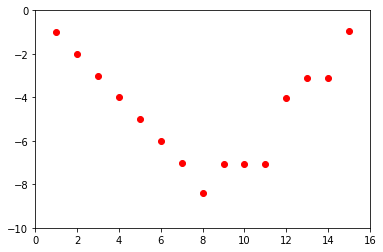

In [2]:
import math
import matplotlib.pyplot as plt
def f(x):
    return x*(x-1)
delta=[]
err=[]
c=0
for i in range (1,16,1):
    #print(i,10**-i,f(1+10**-i)-f(1),(f(1+10**-i)-f(1))/10**-i,((f(1+10**-i)-f(1))/10**-i)-1)
    # print(i,((f(1+10**-i)-f(1))/10**-i)-1)
    delta.append(i)
    err.append(math.log10(abs(((f(1+10**-i)-f(1))/10**-i)-1)))
    c=c+1

plt.plot(delta, err, 'ro')
plt.axis([0, 16, -10, 0])
plt.show()

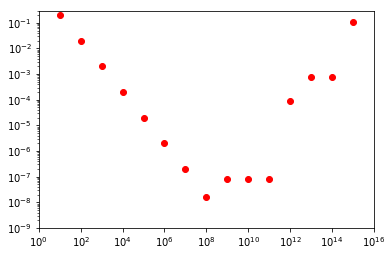

In [27]:
import math
import matplotlib.pyplot as plt
def f(x):
    #return x*(x-1)
    #return x**2-x
    return x**3-x**2
    #return x**4-x**3
delta=[]
err=[]
c=0
for i in range (1,16,1):
    # print(i,10**-i,f(1+10**-i)-f(1),(f(1+10**-i)-f(1))/10**-i,((f(1+10**-i)-f(1))/10**-i)-1)
    # print(i,((f(1+10**-i)-f(1))/10**-i)-1)
    delta.append(10**i)
    err.append(abs(((f(1+10**-i)-f(1))/10**-i)-1))
    c=c+1

plt.plot(delta, err, 'ro')
plt.axis([1, 10**16, 1e-9, 3e-1])
plt.xscale('log')
plt.yscale('log')
plt.show()

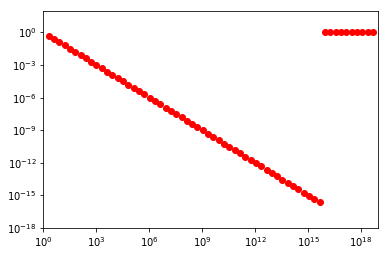

In [25]:
import math
import matplotlib.pyplot as plt
def f(x):
    return x*(x-1)
    #return x**2-x
    #return x**3-x**2
    #return x**4-x**3
delta=[]
err=[]
c=0
for i in range (1,63,1):
    # print(i,10**-i,f(1+10**-i)-f(1),(f(1+10**-i)-f(1))/10**-i,((f(1+10**-i)-f(1))/10**-i)-1)
    # print(i,((f(1+10**-i)-f(1))/10**-i)-1)
    delta.append(2**i)
    err.append(abs(((f(1+2**-i)-f(1))/2**-i)-1))
    c=c+1

plt.plot(delta, err, 'ro')
plt.axis([1, 2**63, 1e-18, 100])
plt.xscale('log')
plt.yscale('log')
plt.show()

7\. Consider the integral of the semicircle of radius 1:
$$
I=\int_{-1}^{1} \sqrt(1-x^2) {\rm d}x
$$
which it's known to be $I=\frac{\pi}{2}=1.57079632679...$.
Alternatively we can use the Riemann definition of the integral:
$$
I=\lim_{N\to\infty} \sum_{k=1}^{N} h y_k 
$$

with $h=2/N$ the width of each of the $N$ slices the domain is divided into and where
$y_k$ is the value of the function at the $k-$th slice.

(a) Write a programe to compute the integral with $N=100$. How does the result compares to the true value?

(b) How much can $N$ be increased if the computation needs to be run in less than a second? What is the gain in running it for 1 minute? 


In [49]:
import math as m
def integral(N):
    def y(x):
        return m.sqrt(1-x**2)
    I=0
    for i in range (1,N+1):
        I=I+(2/N)*y(-1+(2*i-1)/N)
    return(I-(m.pi)/2)
result=[]
result.append(integral(100)) # 75.7 µs ± 2.77 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each))
result.append(integral(1000)) # 760 µs ± 25.8 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)
result.append(integral(10000)) # 7.55 ms ± 38.3 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)
result.append(integral(100000)) # 75.1 ms ± 410 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)
result.append(integral(1000000)) # 761 ms ± 20.2 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
result.append(integral(10000000)) # 7.62 s ± 96.3 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
result.append(integral(100000000)) # 1min 24s ± 2.81 s per loop (mean ± std. dev. of 7 runs, 1 loop each)
for a in range (7):
              print(result[a])

0.00048644943489928316
1.540161506019544e-05
4.871011312079787e-07
1.5403679887171506e-08
4.871483216817296e-10
1.5162981981120538e-11
6.477041125663163e-13


In [27]:
import math as m
def integral(N):
    def y(x):
        return m.sqrt(1-x**2)
    I=0
    for i in range (1,N+1):
        I=I+(2/N)*y(-1+(2*i-1)/N)
%timeit integral(100)
%timeit integral(1000)
%timeit integral(10000)
%timeit integral(100000)
%timeit integral(1000000)
%timeit integral(10000000)
%timeit integral(100000000)

75.7 µs ± 2.77 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)
760 µs ± 25.8 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)
7.55 ms ± 38.3 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)
75.1 ms ± 410 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)
761 ms ± 20.2 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
7.62 s ± 96.3 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


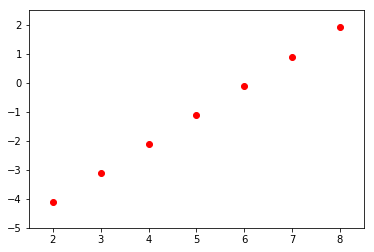

In [48]:
import math as m
import matplotlib.pyplot as plt
runs=[b for b in range (2,9)]
times=[75.7e-6, 760e-6, 7.55e-3, 75.1e-3, 761e-3, 7.62, 84]
for c in range (7):
              times[c]=m.log10(times[c])
plt.plot(runs, times, 'ro')
plt.axis([1.5, 8.5, -5, 2.5])
plt.show()

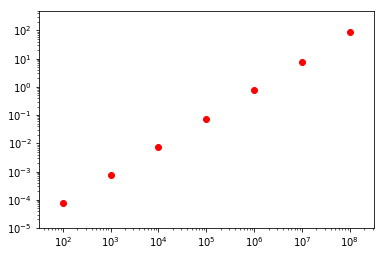

In [57]:
import math as m
import matplotlib.pyplot as plt
runs=[10**b for b in range (2,9)]
times=[75.7e-6, 760e-6, 7.55e-3, 75.1e-3, 761e-3, 7.62, 84]
plt.plot(runs, times, 'ro')
plt.xscale('log')
plt.yscale('log')
plt.axis([10**(1.5), 10**(8.5), 1e-5, 5e2])
plt.show()